In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score,precision_score, make_scorer,fbeta_score
from sklearn import svm, tree
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, train_test_split
from wordcloud import WordCloud
from collections import Counter
from itertools import combinations
from gensim import models,corpora,similarities
from nltk.util import ngrams
import string
import matplotlib.pyplot as plt
import re

from bs4 import BeautifulSoup
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [9]:
df=pd.read_csv(r"C:\Users\MANGALGI\Documents\mani.csv",encoding = 'unicode_escape')

In [3]:
df.head()

,Unnamed: 0,User_ID,Description,Is_Response,range
0,1,11755,After reading mixed reviews I almost didn't bo...,Good,Positive
1,2,33912,This motor inn is located about - city blocks ...,Good,Positive
2,3,10143,It was our first time there and surely not our...,Good,Positive
3,4,33114,"Great hotel in an excellent location, just off...",Good,Positive
4,5,17464,We stayed at the hotel for - weeks to get away...,Good,Positive


In [8]:
df.head()

,Unnamed: 0,Description,Is_Response
0,1,After reading mixed reviews I almost didn't bo...,Good
1,2,This motor inn is located about - city blocks ...,Good
2,3,It was our first time there and surely not our...,Good
3,4,"Great hotel in an excellent location, just off...",Good
4,5,We stayed at the hotel for - weeks to get away...,Good


In [9]:
#Remove stopwords
stop = stopwords.words('english')
df['review_without_stopwords'] = df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [6]:
df.head()

,Description,Is_Response,review_without_stopwords
0,The room was kind of clean but had a VERY stro...,not happy,The room kind clean VERY strong smell dogs. Ge...
1,I stayed at the Crown Plaza April -- - April -...,not happy,"I stayed Crown Plaza April -- - April --, ----..."
2,I booked this hotel through Hotwire at the low...,not happy,I booked hotel Hotwire lowest price I could fi...
3,Stayed here with husband and sons on the way t...,happy,Stayed husband sons way Alaska Cruise. We love...
4,My girlfriends and I stayed here to celebrate ...,not happy,My girlfriends I stayed celebrate --th birthda...


In [10]:
# remove special characters, numbers, punctuations
df['review_without_stopwords'] = df['review_without_stopwords'].str.replace("[^a-zA-Z#]", " ")

In [11]:
df['review_without_stopwords'].head()

0    After reading mixed reviews I almost book W  I...
1    This motor inn located   city blocks Fisherman...
2    It first time surely last  Arrived early train...
3    Great hotel excellent location  Times Square n...
4    We stayed hotel   weeks get away long Massachu...
Name: review_without_stopwords, dtype: object

In [12]:
#remove common words
df['review_without_stopwords'] = df['review_without_stopwords'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
df.head()

,Unnamed: 0,Description,Is_Response,review_without_stopwords
0,1,After reading mixed reviews I almost didn't bo...,Good,After reading mixed reviews almost book attend...
1,2,This motor inn is located about - city blocks ...,Good,This motor located city blocks Fisherman Warf ...
2,3,It was our first time there and surely not our...,Good,first time surely last Arrived early train wen...
3,4,"Great hotel in an excellent location, just off...",Good,Great hotel excellent location Times Square ne...
4,5,We stayed at the hotel for - weeks to get away...,Good,stayed hotel weeks away long Massachusetts win...


In [14]:
#POS Tagging using Textblob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1056)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1056)>


False

In [15]:
#Parts Of Speech Tagging
from textblob import TextBlob
def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags

In [16]:
os = df.review_without_stopwords.apply(pos)
os1 = pd.DataFrame(os)
os1.head()

,review_without_stopwords
0,"[(After, IN), (reading, VBG), (mixed, JJ), (re..."
1,"[(This, DT), (motor, NN), (located, VBN), (cit..."
2,"[(first, JJ), (time, NN), (surely, RB), (last,..."
3,"[(Great, NNP), (hotel, NN), (excellent, NN), (..."
4,"[(stayed, JJ), (hotel, NN), (weeks, NNS), (awa..."


In [18]:
from textblob import TextBlob
def noun(review_without_stopwords):
    return TextBlob(review_without_stopwords).noun_phrases

In [19]:
noun = df.review_without_stopwords.apply(noun)
noun1 = pd.DataFrame(os)
noun1.head()


**********************************************************************
  Resource brown not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('brown')
  
  Attempted to load corpora/brown

  Searched in:
    - 'C:\\Users\\MANGALGI/nltk_data'
    - 'C:\\Users\\MANGALGI\\Anaconda3\\nltk_data'
    - 'C:\\Users\\MANGALGI\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\MANGALGI\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\MANGALGI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [20]:
nltk.download('brown')

[nltk_data] Error loading brown: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1056)>


False

In [12]:

os.head()

0    [(room, NN), (kind, NN), (clean, JJ), (VERY, N...
1    [(stayed, VBN), (Crown, NNP), (Plaza, NNP), (A...
2    [(booked, JJ), (hotel, NN), (Hotwire, NNP), (l...
3    [(Stayed, NNP), (husband, NN), (sons, NNS), (A...
4    [(girlfriends, NNS), (stayed, VBD), (celebrate...
Name: review_without_stopwords, dtype: object

NameError: name 'tag' is not defined

In [10]:
os1['pos'] = os1['review_without_stopwords'].map(lambda x:" ".join(["/".join(x) for x in x ]) )

In [16]:
os1.head()

,review_without_stopwords,pos
0,"[(room, NN), (kind, NN), (clean, JJ), (VERY, N...",room/NN kind/NN clean/JJ VERY/NNP strong/JJ sm...
1,"[(stayed, VBN), (Crown, NNP), (Plaza, NNP), (A...",stayed/VBN Crown/NNP Plaza/NNP April/NNP April...
2,"[(booked, JJ), (hotel, NN), (Hotwire, NNP), (l...",booked/JJ hotel/NN Hotwire/NNP lowest/JJS pric...
3,"[(Stayed, NNP), (husband, NN), (sons, NNS), (A...",Stayed/NNP husband/NN sons/NNS Alaska/NNP Crui...
4,"[(girlfriends, NNS), (stayed, VBD), (celebrate...",girlfriends/NNS stayed/VBD celebrate/NN birthd...


In [11]:
#Merging main file with pos
df = pd.merge(df, os1,right_index=True,left_index = True)
df.head()

,User_ID,Description,Is_Response,review_without_stopwords_x,review_without_stopwords_y,pos
0,id10326,The room was kind of clean but had a VERY stro...,0,room kind clean VERY strong smell dogs General...,"[(room, NN), (kind, NN), (clean, JJ), (VERY, N...",room/NN kind/NN clean/JJ VERY/NNP strong/JJ sm...
1,id10327,I stayed at the Crown Plaza April -- - April -...,0,stayed Crown Plaza April April staff friendly ...,"[(stayed, VBN), (Crown, NNP), (Plaza, NNP), (A...",stayed/VBN Crown/NNP Plaza/NNP April/NNP April...
2,id10328,I booked this hotel through Hotwire at the low...,0,booked hotel Hotwire lowest price could find W...,"[(booked, JJ), (hotel, NN), (Hotwire, NNP), (l...",booked/JJ hotel/NN Hotwire/NNP lowest/JJS pric...
3,id10329,Stayed here with husband and sons on the way t...,1,Stayed husband sons Alaska Cruise loved hotel ...,"[(Stayed, NNP), (husband, NN), (sons, NNS), (A...",Stayed/NNP husband/NN sons/NNS Alaska/NNP Crui...
4,id10330,My girlfriends and I stayed here to celebrate ...,0,girlfriends stayed celebrate birthdays planned...,"[(girlfriends, NNS), (stayed, VBD), (celebrate...",girlfriends/NNS stayed/VBD celebrate/NN birthd...


In [26]:
df['clean_data']=df['review_without_stopwords_x']

In [30]:

tokenized_text = df['review_without_stopwords_x'].apply(lambda x: x.split())
tokenized_text.head()

0    [room, kind, clean, VERY, strong, smell, dogs,...
1    [stayed, Crown, Plaza, April, April, staff, fr...
2    [booked, hotel, Hotwire, lowest, price, could,...
3    [Stayed, husband, sons, Alaska, Cruise, loved,...
4    [girlfriends, stayed, celebrate, birthdays, pl...
Name: review_without_stopwords_x, dtype: object

In [28]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_text.head()

0    [room, kind, clean, veri, strong, smell, dog, ...
1    [stay, crown, plaza, april, april, staff, frie...
2    [book, hotel, hotwir, lowest, price, could, fi...
3    [stay, husband, son, alaska, cruis, love, hote...
4    [girlfriend, stay, celebr, birthday, plan, wee...
Name: clean_data, dtype: object

In [31]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])

df['review_without_stopwords_x'] = tokenized_text
 

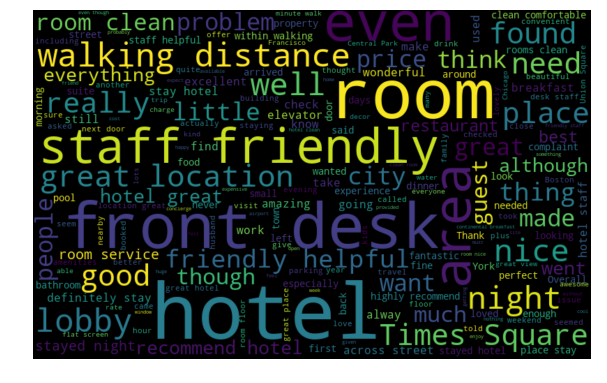

In [32]:
#Wordcloud of Positive Sentiments
normal_words =' '.join([text for text in df['review_without_stopwords_x'][df['Is_Response'] == 'happy']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


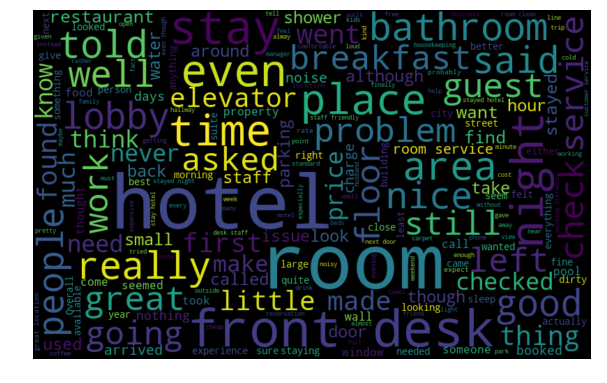

In [33]:
#Wordcloud of Negative Sentiments
normal_words =' '.join([text for text in df['review_without_stopwords_x'][df['Is_Response'] == 'not happy']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['pos'])
bow.head()

NameError: name 'df' is not defined

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['pos'])


In [54]:
#Classification- Splitting data ito training and testing tfidf
from sklearn.model_selection import train_test_split

tX = tfidf # the features we want to analyze bag of words
tylabels = df['Is_Response'] # the labels, or answers, we want to test against

tX_train, tX_test, ty_train, ty_test = train_test_split(tX, tylabels, test_size=0.3)

In [51]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
import model_evaluation_utils as meu


In [35]:
lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

In [53]:

# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=X_train, train_labels=y_train,
                                             test_features=X_test, test_labels=y_test)
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=lr_bow_predictions,
                                      classes=['happy', 'not happy'])

C:\Users\MANGALGI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.8682
Precision: 0.8664
Recall: 0.8682
F1 Score: 0.8663

Model Classification report:
------------------------------
              precision    recall  f1-score   support

       happy       0.89      0.93      0.91      7932
   not happy       0.83      0.75      0.78      3748

   micro avg       0.87      0.87      0.87     11680
   macro avg       0.86      0.84      0.84     11680
weighted avg       0.87      0.87      0.87     11680


Prediction Confusion Matrix:
------------------------------


C:\Users\MANGALGI\model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
C:\Users\MANGALGI\model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


                  Predicted:          
                       happy not happy
Actual: happy           7346       586
        not happy        953      2795


In [55]:
# Logistic Regression model on TF-IDF features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=tX_train, train_labels=ty_train,
                                             test_features=tX_test, test_labels=ty_test)
meu.display_model_performance_metrics(true_labels=ty_test, predicted_labels=lr_bow_predictions,
                                      classes=['happy', 'not happy'])

Model Performance metrics:
------------------------------
Accuracy: 0.8732
Precision: 0.8715
Recall: 0.8732
F1 Score: 0.8716

Model Classification report:
------------------------------
              precision    recall  f1-score   support

       happy       0.89      0.93      0.91      7941
   not happy       0.83      0.76      0.79      3739

   micro avg       0.87      0.87      0.87     11680
   macro avg       0.86      0.84      0.85     11680
weighted avg       0.87      0.87      0.87     11680


Prediction Confusion Matrix:
------------------------------
                  Predicted:          
                       happy not happy
Actual: happy           7364       577
        not happy        904      2835


In [56]:
# SVM model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=svm, 
                                             train_features=X_train, train_labels=y_train,
                                             test_features=X_test, test_labels=y_test)
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=lr_bow_predictions,
                                      classes=['happy', 'not happy'])

C:\Users\MANGALGI\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.8676
Precision: 0.8657
Recall: 0.8676
F1 Score: 0.8658

Model Classification report:
------------------------------
              precision    recall  f1-score   support

       happy       0.89      0.92      0.90      7932
   not happy       0.82      0.75      0.78      3748

   micro avg       0.87      0.87      0.87     11680
   macro avg       0.85      0.84      0.84     11680
weighted avg       0.87      0.87      0.87     11680


Prediction Confusion Matrix:
------------------------------
                  Predicted:          
                       happy not happy
Actual: happy           7325       607
        not happy        940      2808


In [58]:
# SVM model on TF-IDF features
lr_bow_predictions = meu.train_predict_model(classifier=svm, 
                                             train_features=tX_train, train_labels=ty_train,
                                             test_features=tX_test, test_labels=ty_test)
meu.display_model_performance_metrics(true_labels=ty_test, predicted_labels=lr_bow_predictions,
                                      classes=['happy', 'not happy'])

Model Performance metrics:
------------------------------
Accuracy: 0.874
Precision: 0.8723
Recall: 0.874
F1 Score: 0.8721

Model Classification report:
------------------------------
              precision    recall  f1-score   support

       happy       0.89      0.93      0.91      7941
   not happy       0.84      0.75      0.79      3739

   micro avg       0.87      0.87      0.87     11680
   macro avg       0.86      0.84      0.85     11680
weighted avg       0.87      0.87      0.87     11680


Prediction Confusion Matrix:
------------------------------
                  Predicted:          
                       happy not happy
Actual: happy           7394       547
        not happy        925      2814
